# Importing Libraries

In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

# Plotting Results

In [2]:
# Obtaining the train data
with open("out/base_metric_results.json") as f:
  training_data = json.load(f)

In [3]:
# Obtaining best accuracy for each number of classes
def gather_best(data, dataset):
  output = {}

  for key in data[dataset].keys():
      best_acc = data[dataset][key]['Best Results']['Validation Accuracy']
      num_classes = len(key.split('-'))

      if num_classes not in output:
          output[num_classes] = []

      output[num_classes].append(best_acc)
  
  return output

best_accs_stan = gather_best(training_data, 'stanford-dogs')
best_accs_ox = gather_best(training_data, 'oxford-pet')

For the Stanford Dog dataset:


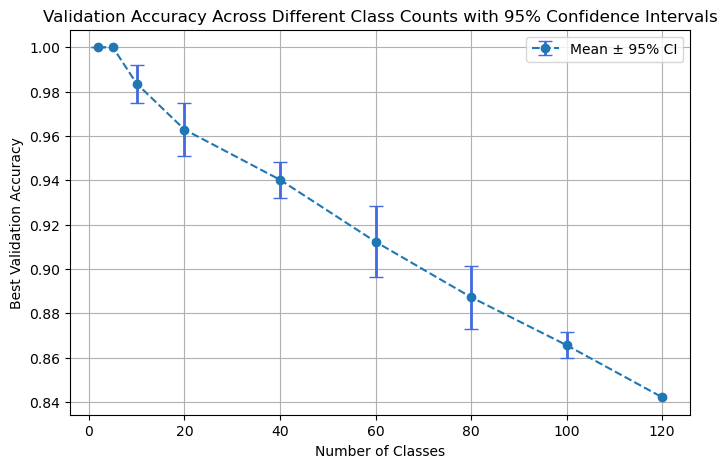

For the Oxford Pet dataset:


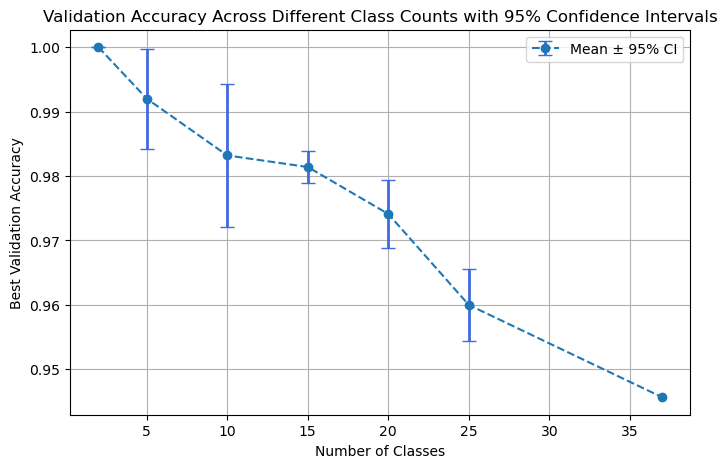

In [4]:
# Plotting best accuracies vs. number of classes
def plot_finetune_data(dataset_train_data):
    plt.figure(figsize=(8, 5))
    
    # Extract x values and corresponding y arrays
    x_values = list(dataset_train_data.keys())
    y_values = [np.array(dataset_train_data[x]) for x in x_values]

    # Compute mean and confidence intervals
    means = [np.mean(y) for y in y_values]
    std_devs = [np.std(y, ddof=1) for y in y_values]
    sample_sizes = [len(y) for y in y_values]
    conf_intervals = [1.96 * (std / np.sqrt(n)) for std, n in zip(std_devs, sample_sizes)]

    # Sort data by x-values
    sorted_data = sorted(zip(x_values, means, conf_intervals), key=lambda x: x[0])
    x_sorted, means_sorted, conf_intervals_sorted = zip(*sorted_data)

    # Plot the means and confidence intervals using error bars
    plt.errorbar(
        x_sorted, 
        means_sorted, 
        yerr=conf_intervals_sorted, 
        fmt="--o", 
        ecolor='royalblue', 
        elinewidth=2, 
        capsize=5, 
        label='Mean ± 95% CI'
    )

    # Add labels, legend, and grid
    plt.xlabel('Number of Classes')
    plt.ylabel('Best Validation Accuracy')
    plt.title('Validation Accuracy Across Different Class Counts with 95% Confidence Intervals')
    plt.legend()
    plt.grid(True)
    return plt.show()

print("For the Stanford Dog dataset:")
plot_finetune_data(best_accs_stan)
print("For the Oxford Pet dataset:")
plot_finetune_data(best_accs_ox)